# Homework Python Promgramming - Data Analytic III
  * Created by: ARIF FIRMANSYAH
  * Date: 2019-11-06


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/firmansyah2308/homework_basic_programming/master/train.csv', encoding= 'latin1')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---
### How many survivors in dataset?

---
* Graph: Comparison Number of Passenger - **Died vs Survived**

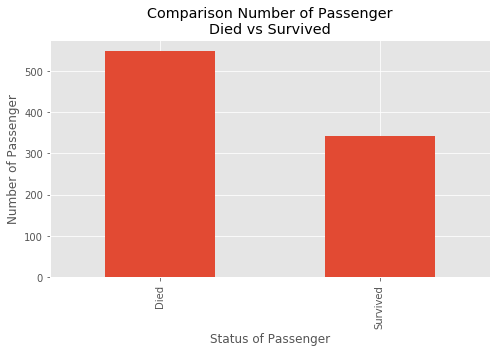

In [116]:
df['StatusPassenger']=df.Survived.map({0:'Died',1:'Survived'})

plt.style.use('ggplot')
fig, ax = plt.subplots()

df.groupby(df['StatusPassenger']).count().Name.plot(kind='bar', figsize=(7,5));

ax.set_xlabel('Status of Passenger')
ax.set_ylabel('Number of Passenger')
ax.set_title('Comparison Number of Passenger\nDied vs Survived')

plt.tight_layout()
plt.show()

In [32]:
survivor = df[df['Survived']== 1].count().Name
died = df[df['Survived']== 0].count().Name

print('Survived:', survivor, 'persons,', survivor/(died+survivor)*100, '%' )
print('Died:', died, 'persons,', died/(died+survivor)*100, '%')

Survived: 342 persons, 38.38383838383838 %
Died: 549 persons, 61.61616161616161 %


---
* Graph: Number of Survivor based on **Gender**

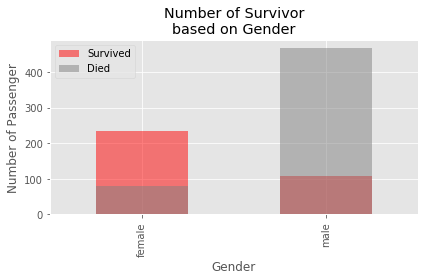

In [106]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
df[df['Survived']== 1].groupby(['Sex']).count().Name.plot(alpha=0.5,color='red',kind='bar')
df[df['Survived']== 0].groupby(['Sex']).count().Name.plot(alpha=0.5,color='gray',kind='bar')

plt.legend(['Survived','Died'])
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Passenger')
ax.set_title('Number of Survivor\nbased on Gender')

plt.tight_layout()
plt.show()

In [82]:
df.groupby(['StatusPassenger','Sex']).count().Name

StatusPassenger  Sex   
Died             female     81
                 male      468
Survived         female    233
                 male      109
Name: Name, dtype: int64

---
* Graph: Number of Survivor based on **Class**

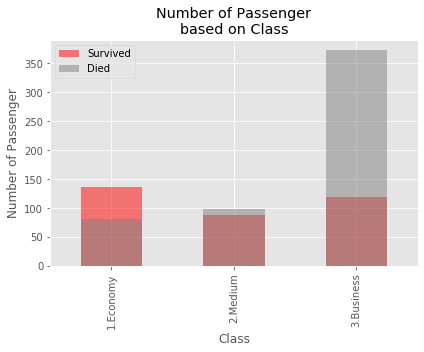

In [112]:
df['StatusClass']=df.Pclass.map({1:'1.Upper',2:'2.Middle',3:'3.Lower'})

plt.style.use('ggplot')
fig, ax = plt.subplots()
df[df['Survived']== 1].groupby(['StatusClass']).count().Name.plot(alpha=0.5,color='red',kind='bar',figsize=(6,5))
df[df['Survived']== 0].groupby(['StatusClass']).count().Name.plot(alpha=0.5,color='gray',kind='bar',figsize=(6,5))

plt.legend(['Survived','Died'])
ax.set_xlabel('Class')
ax.set_ylabel('Number of Passenger')
ax.set_title('Number of Passenger\nbased on Class')

plt.tight_layout()
plt.show()

In [118]:
df.groupby(['StatusPassenger','StatusClass']).count().Name

StatusPassenger  StatusClass
Died             1.Economy       80
                 2.Medium        97
                 3.Business     372
Survived         1.Economy      136
                 2.Medium        87
                 3.Business     119
Name: Name, dtype: int64

---
* Graph: Number of Survivor based on **Age**

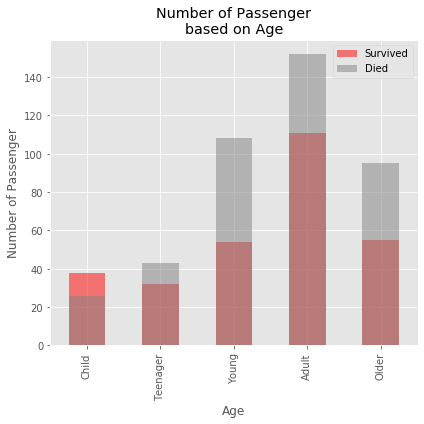

In [115]:
agesplit = [0,10,18,25,40,90]
agestatus = ['Child','Teenager','Young','Adult','Older']

plt.style.use('ggplot')
fig, ax = plt.subplots()

df['AgeGroup']=pd.cut(df.Age,agesplit,labels=agestatus)
df[df['Survived'] == 1].groupby(['AgeGroup']).count().Name.plot(alpha=0.5,color='red',kind='bar', figsize=(6,6))
df[df['Survived'] == 0].groupby(['AgeGroup']).count().Name.plot(alpha=0.5,color='gray',kind='bar', figsize=(6,6))

plt.legend(['Survived','Died'])

ax.set_xlabel('Age')
ax.set_ylabel('Number of Passenger')
ax.set_title('Number of Passenger\nbased on Age')

plt.tight_layout()
plt.show()

### Conclusion:
* Based on Gender, Female had dominated survivors
* Based on Class, The business class had low survival ability
* Based on Age Group, Child had high ratio of survival ability, but Adult had dominated in number of passenger

---
### Others....

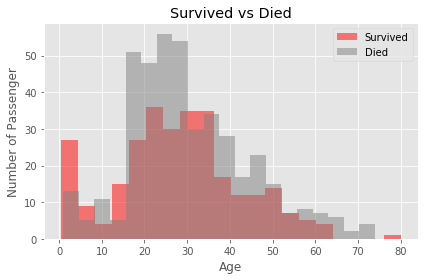

In [16]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

survived['Age'].plot.hist(alpha=0.5,color='red',bins=20)
died['Age'].plot.hist(alpha=0.5,color='gray',bins=20)

plt.legend(['Survived','Died'])

ax.set_xlabel('Age')
ax.set_ylabel('Number of Passenger')
ax.set_title('Survived vs Died')

plt.tight_layout()
plt.show()

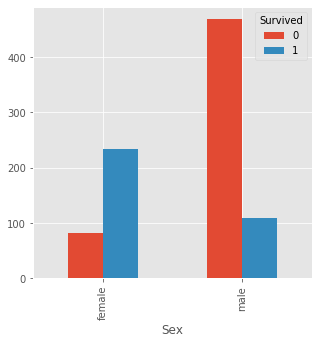

In [14]:
pd.crosstab(df.Sex, df.Survived, margins=False).plot(kind='bar', figsize=(5,5));

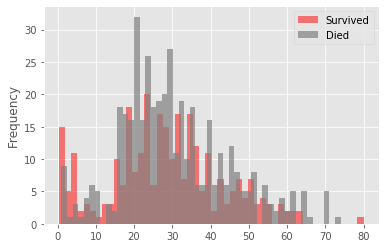

In [15]:
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.7,color='gray',bins=50)
plt.legend(['Survived','Died'])
plt.show()